#### Import data set

In [1]:
import datatable as dt
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

df = dt.fread('tripadvisor_hotel_reviews.csv').to_pandas()
df.columns= df.columns.str.lower()

#### Data cleaning

In [2]:
# Check for missing data
df.isnull().sum()

review    0
rating    0
dtype: int64

In [3]:
import re
import spacy
from spacy.matcher import Matcher

def clean_text(t):
    '''Removes punctuations from t'''
    return re.sub(r'[^\w\s]', '', t)

# Use vectorization
df['review'] = np.vectorize(clean_text)(df['review'])

# Add a column length of review 
df['review_length'] = df['review'].map(lambda x: len(x))

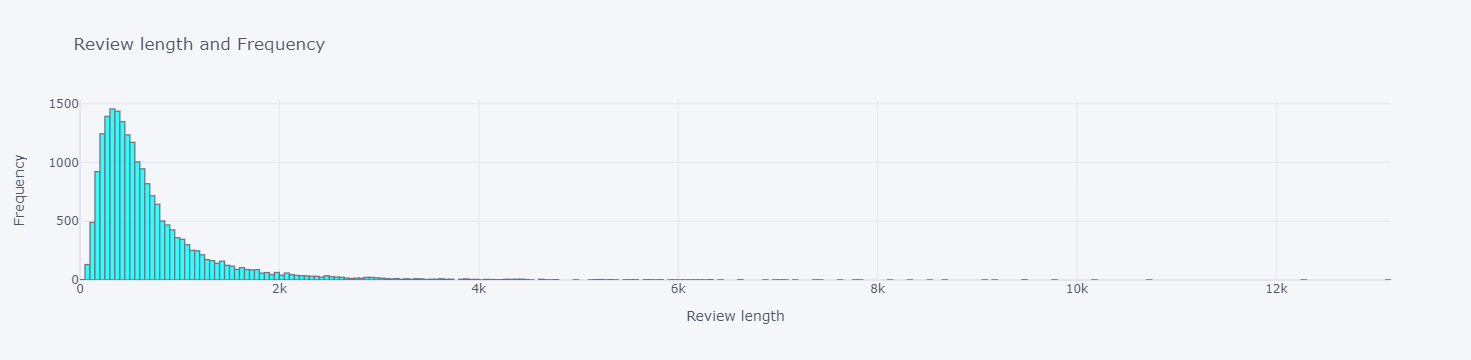

In [4]:
import plotly.express as px
import cufflinks as cf
# This is to use iplot functions based on pandas
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

fig1 = df['review_length'].iplot(kind='hist', color='aqua', xTitle='Review length', yTitle='Frequency', title='Review length and Frequency')

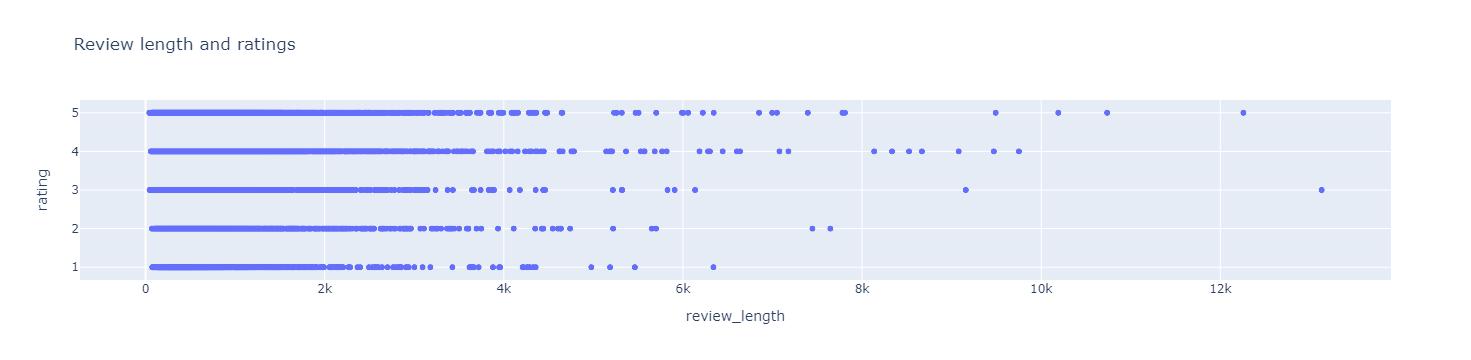

In [5]:
fig2 = px.scatter(df, x="review_length", y="rating", title='Review length and ratings')
fig2.show()

In [6]:
# Create a table of review length associated with different ratings
df.groupby(by=['rating']).describe()

review_length                                                       \
               count        mean         std   min     25%    50%     75%   
rating                                                                      
1             1421.0  751.410274  671.874592  75.0  342.00  553.0   919.0   
2             1793.0  846.737869  727.524687  72.0  422.00  638.0  1004.0   
3             2184.0  765.882784  725.458257  45.0  363.00  574.0   909.5   
4             6039.0  727.963073  711.647057  60.0  332.50  528.0   863.0   
5             9054.0  646.709410  612.141008  42.0  310.25  485.0   767.0   

                 
            max  
rating           
1        6341.0  
2        7646.0  
3       13132.0  
4        9751.0  
5       12258.0

We can see the pattern that those who are more satisfied are more likely to give reviews. Also, the data set is not balanced among ratings.

In [7]:
# Save cleaned reviews to csv file
df['review'].to_csv('reviews.csv')

In [8]:
def remove_sw(text):
    # This removes stop words
    en = spacy.load('en_core_web_sm')
    stopwords = en.Defaults.stop_words
    filtered_words = [t for t in text.split() if t.lower() not in stopwords]
    return filtered_words

filtered_words = remove_sw(' '.join(df['review'].tolist()))

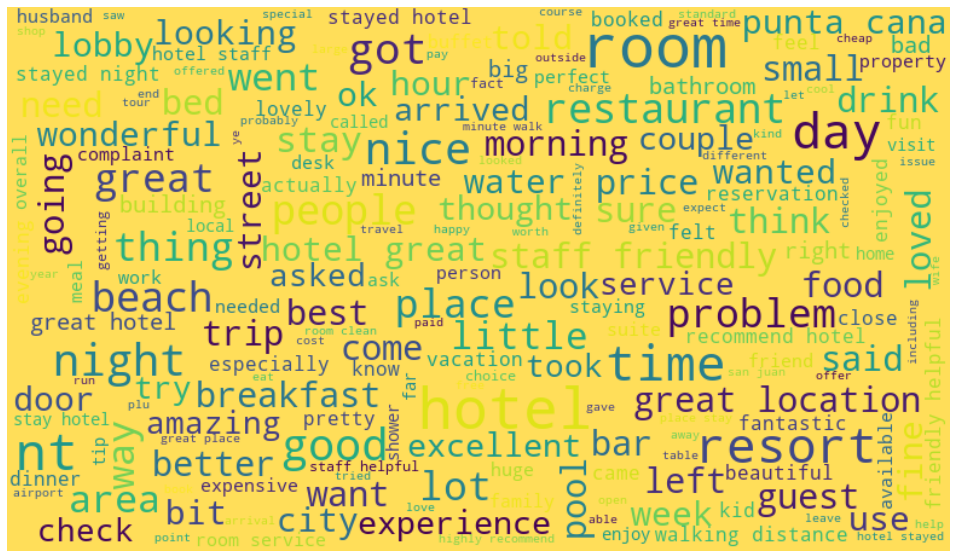

In [9]:
from wordcloud import WordCloud

# Generate a word cloud image of document
wordcloud = WordCloud(width=780, height=450, max_font_size=50,
 background_color="#ffde59").generate(' '.join(filtered_words))

# Display the generated image:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

* Even though this word cloud can give us a general idea how to extract features, they only handle single words instead of noun chunks.
* I tried noun chunks but the most common phrases only existed once. It failed
* I tried gensim summarize but it was removed
* Is there a better way? https://explosion.ai/demos/matcher
* https://www.youtube.com/watch?v=GQ6OT2HyfPs